# **Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [2]:
dataset = pd.read_csv('data/market_cluster.csv', encoding='latin1')


In [3]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Medium
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Medium
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
 11  profit_margin  9994 non-null   float64
 12  Cluster        9994 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [5]:
dataset.describe()

,Sales,Discount,Profit,profit_margin
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082,0.250228
std,577.559036,0.074636,239.932881,0.118919
min,500.000000,0.100000,25.250000,0.050000
25%,1000.000000,0.160000,180.022500,0.150000
50%,1498.000000,0.230000,320.780000,0.250000
75%,1994.750000,0.290000,525.627500,0.350000
max,2500.000000,0.350000,1120.950000,0.450000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
 11  profit_margin  9994 non-null   float64
 12  Cluster        9994 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


# **Data Cleaning & Preprocessing**

In [7]:
dataset.drop(['Order ID'], axis=1, inplace=True)

In [8]:
dataset.isna().sum()

Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
profit_margin    0
Cluster          0
dtype: int64

In [9]:
dataset.dropna(inplace=True)

In [10]:
def remove_outliers(data: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

dataset = remove_outliers(dataset, 'Discount')
dataset = remove_outliers(dataset, 'Sales')
dataset = remove_outliers(dataset, 'Profit')

In [11]:
dataset.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Medium
1,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Medium
2,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low
4,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High


<AxesSubplot:xlabel='Cluster', ylabel='Count'>

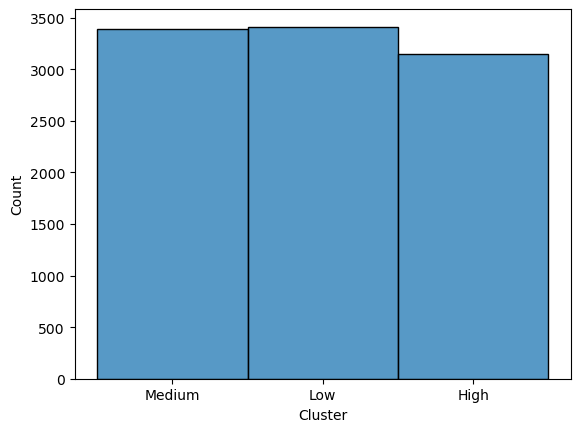

In [12]:
sns.histplot(dataset['Cluster'])

In [13]:
encoder = LabelEncoder()
scaler = StandardScaler()
onehot = OneHotEncoder()

In [14]:
dataset["Order Date"] = pd.to_datetime(dataset["Order Date"])
dataset["Order Date"] = dataset["Order Date"].dt.month

dataset["Customer Name"] = encoder.fit_transform(dataset["Customer Name"])
dataset["Category"] = encoder.fit_transform(dataset["Category"])
dataset["City"] = encoder.fit_transform(dataset["City"])
dataset["Region"] = encoder.fit_transform(dataset["Region"])
dataset["State"] = encoder.fit_transform(dataset["State"])
dataset["Sub Category"] = encoder.fit_transform(dataset["Sub Category"])

# dataset["Customer Name"] = onehot.fit_transform(dataset["Customer Name"].values.reshape(-1, 1)).toarray()
# dataset["Category"] = onehot.fit_transform(dataset["Category"].values.reshape(-1, 1)).toarray()
# dataset["City"] = onehot.fit_transform(dataset["City"].values.reshape(-1, 1)).toarray()
# dataset["Region"] = onehot.fit_transform(dataset["Region"].values.reshape(-1, 1)).toarray()
# dataset["State"] = onehot.fit_transform(dataset["State"].values.reshape(-1, 1)).toarray()
# dataset["Sub Category"] = onehot.fit_transform(dataset["Sub Category"].values.reshape(-1, 1)).toarray()

dataset["Order Date"] = encoder.fit_transform(dataset["Order Date"])

In [15]:
dataset[["Sales", "Discount", "profit_margin","Profit"]] = scaler.fit_transform(dataset[["Sales", "Discount", "profit_margin","Profit"]])

In [16]:
class_to_numeric = {'Low': 0, 'Medium': 1, 'High': 2}
dataset['Cluster'] = [class_to_numeric[label] for label in dataset['Cluster']]

In [17]:
dataset.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,12,5,14,21,10,2,-0.414559,-1.430908,0.124389,0,0.595874,1
1,37,1,13,8,10,3,-1.291968,-0.627370,-0.941183,0,-0.416872,1
2,14,3,0,13,5,4,1.507054,-0.225601,-0.875930,0,-1.514014,0
3,15,4,12,4,9,3,-1.036563,0.310092,-1.196262,0,-1.260827,0
4,28,3,18,12,9,3,1.498367,0.444015,2.315743,0,1.186643,2


# **Split Data**

In [18]:
X = dataset.drop(['Cluster','Sub Category','State','profit_margin'],axis=1)
y = dataset['Cluster']

In [19]:
X.head()

,Customer Name,Category,City,Order Date,Region,Sales,Discount,Profit
0,12,5,21,10,2,-0.414559,-1.430908,0.124389
1,37,1,8,10,3,-1.291968,-0.627370,-0.941183
2,14,3,13,5,4,1.507054,-0.225601,-0.875930
3,15,4,4,9,3,-1.036563,0.310092,-1.196262
4,28,3,12,9,3,1.498367,0.444015,2.315743


In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<AxesSubplot:>

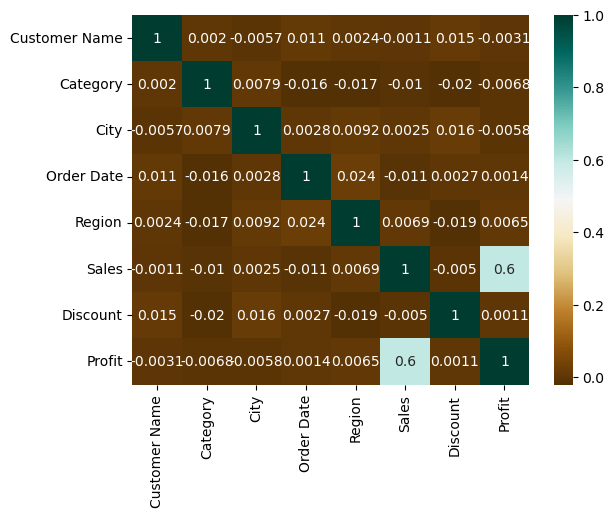

In [21]:
heatcol = X.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

In [22]:
print("Dimension of Train set",X_train.shape)
print("Dimension of Val set",X_val.shape)
print("Dimension of Test set",X_test.shape,"\n")

num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Dimension of Train set (7960, 8)
Dimension of Val set (995, 8)
Dimension of Test set (996, 8) 

Number of numeric features: 8


# **LSTM**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)

In [24]:
def create_model(units=64,optimizer='adam',loss='categorical_crossentropy'):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train.shape[1], 1)))

    model.add(Dense(units, activation='relu'))
    model.add(Dense(units=3, activation='sigmoid'))
    model.compile(loss=loss, optimizer=optimizer, metrics=['categorical_accuracy'])
    return model

In [25]:
model = KerasClassifier(build_fn=create_model, units=32, epochs=100, batch_size=32, verbose=0)

param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'units': [32, 64, 128],
    'loss' : ['categorical_crossentropy','binary_crossentropy','hinge','kullback_leibler_divergence']
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

c:\Users\Asus\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Asus\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Asus\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Asus\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Asus\anaconda3\lib\site-package

In [26]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# best_model = grid_result.best_estimator_
# accuracy = best_model.score(X_val, y_val)
# print("Validation Accuracy: %.2f%%" % (accuracy * 100))

Best: 0.987312 using {'loss': 'categorical_crossentropy', 'optimizer': 'rmsprop', 'units': 32}


In [27]:
optimizer = grid_result.best_params_['optimizer']
units = grid_result.best_params_['units']
loss = grid_result.best_params_['loss']

In [28]:
model = Sequential()
model.add(LSTM(units, return_sequences = False, input_shape=(X_train.shape[1], 1)))

model.add(Dense(units, activation='relu'))
model.add(Dense(units=3, activation='sigmoid'))

model.compile(loss=loss, optimizer=optimizer, metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

accuracy = model.evaluate(X_val, y_val)
print("Accuracy: ", accuracy)

Epoch 1/100
249/249 [==============================] - 3s 5ms/step - loss: 0.8629 - mean_absolute_error: 0.4309 - val_loss: 0.6234 - val_mean_absolute_error: 0.3548
Epoch 2/100
249/249 [==============================] - 1s 3ms/step - loss: 0.4236 - mean_absolute_error: 0.2885 - val_loss: 0.3263 - val_mean_absolute_error: 0.2505
Epoch 3/100
249/249 [==============================] - 1s 3ms/step - loss: 0.2516 - mean_absolute_error: 0.2372 - val_loss: 0.2370 - val_mean_absolute_error: 0.2269
Epoch 4/100
249/249 [==============================] - 1s 3ms/step - loss: 0.1874 - mean_absolute_error: 0.2202 - val_loss: 0.1666 - val_mean_absolute_error: 0.2162
Epoch 5/100
249/249 [==============================] - 1s 3ms/step - loss: 0.1543 - mean_absolute_error: 0.2131 - val_loss: 0.1455 - val_mean_absolute_error: 0.2107
Epoch 6/100
249/249 [==============================] - 1s 3ms/step - loss: 0.1319 - mean_absolute_error: 0.2096 - val_loss: 0.1184 - val_mean_absolute_error: 0.2055
Epoch 7/10

In [29]:
from tensorflow.keras.utils import plot_model
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_73 (LSTM)              (None, 32)                4352      
                                                                 
 dense_146 (Dense)           (None, 32)                1056      
                                                                 
 dense_147 (Dense)           (None, 3)                 99        
                                                                 
Total params: 5507 (21.51 KB)
Trainable params: 5507 (21.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

32/32 [==============================] - 0s 1ms/step


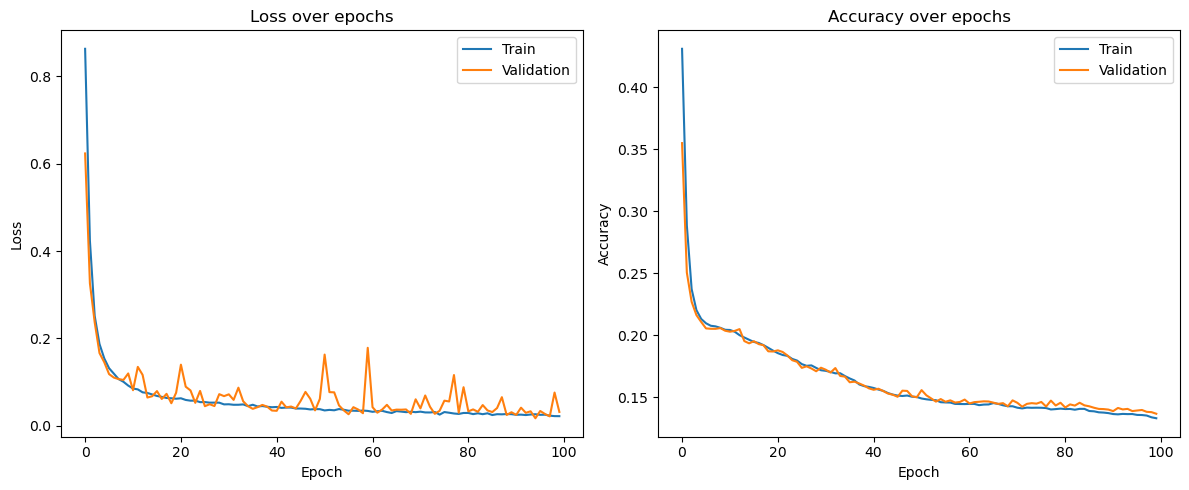

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.tight_layout()
plt.show()


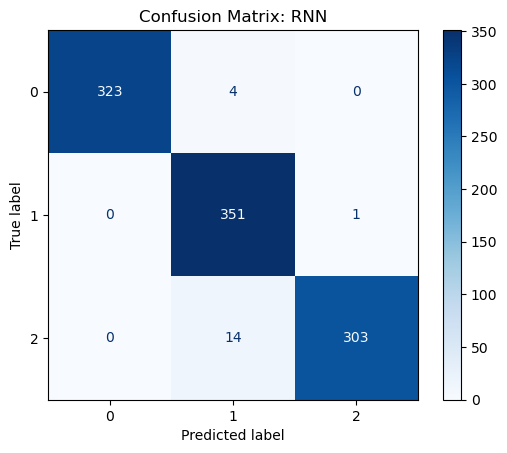

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       327
           1       0.95      1.00      0.97       352
           2       1.00      0.96      0.98       317

    accuracy                           0.98       996
   macro avg       0.98      0.98      0.98       996
weighted avg       0.98      0.98      0.98       996



In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: RNN")
plt.show()

print(classification_report(y_test, y_pred))